<a href="https://www.kaggle.com/code/keshavgairola/zomato-eda?scriptVersionId=160330721" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Zomato Dataset Exploratory Data Analysis

In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Contents
1. [Introduction](#1.-Introduction)
   1. [Missing Values](#1.-Missing-Values)
   2. [Merge Datasets](#2.-Merge-Two-Dataset)
2. [Question On EDA](#Q.-Which-are-the-top-3-country-which-uses-zomato-?)
   1. [Q. Which are the top 3 country which uses zomato ?](#Q.-Which-are-the-top-3-country-which-uses-zomato-?)
   2. [Q. Does zomato's nature of rating follows "Pareto's Principle"? ](#Q.-Does-zomato's-nature-of-rating-follows-"Pareto's-Principle"? )
   3. [Q. Which country rated restraunts as 0 and how many times ?](#Q.-Which-country-rated-restraunts-as-0-and-how-many-times-?)
   4. [Q. Find out which currency is used by which country ? ](#Q.-Find-out-which-currency-is-used-by-which-country-?)
   5. [Q. Which countries have online deliveries option ?](#Q.-Which-Countries-have-online-deliveries-option-?)
   6. [Q. Provide a pie chart representation of restaurants in the top 5 Indian cities that offer online delivery options?](#Q.-Provide-a-pie-chart-representation-of-restaurants-in-the-top-5-Indian-cities-that-offer-online-delivery-options-?)
   7. [Q. Find Top 5 Cuisines in Bar chart form ?](#Q.-Find-Top-5-Cuisines-in-Histogram-form-?)



# 1. Introduction

### Exploratory Data Analysis

It refers to the process of performing initial investigation on data using summary _statistics_ and _graphical_ _representation_
* To measure the data quality 
* To discover patterns
* To spot anamalies

It is a good practice to understand the data first and try to gather as many insights from it. It is all about making sense of data in hand, before getting them dirty with it.

### Steps in EDA

* Getting the basic Data Information like number of columns, data types of these columns
* Data Cleaning/Wrangling
    * Handling Missing Values or human error.
    * Creating new columns if required
    * Removing unwanted columns
* Identifying outliers and relationship between the columns using graphical representation 

In [2]:
df = pd.read_csv("/kaggle/input/zomato-restaurants-data/zomato.csv",encoding = "latin-1")

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## 1. Missing Values

In [7]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

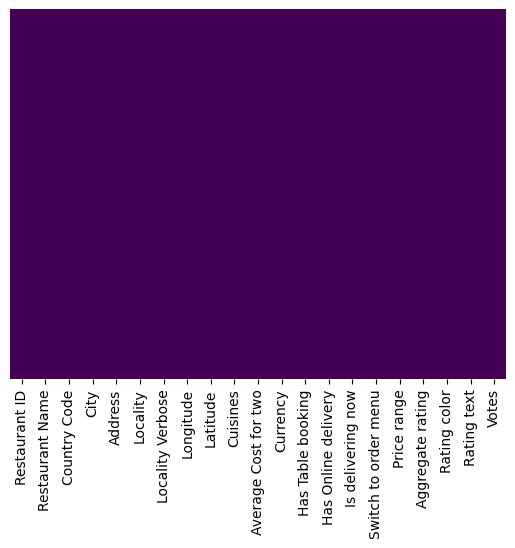

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

## 2. Merge Two Dataset

In [10]:
df_country = pd.read_excel("/kaggle/input/zomato-restaurants-data/Country-Code.xlsx")
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


### Here two type of code syntax is possible

### 1. Type

In [11]:
merged_df = df.merge(df_country, on="Country Code")
merged_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [12]:
merged_df2 = df_country.merge(df,on="Country Code")
merged_df2.head()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


### 2. Type

In [13]:
merge_df3 = pd.merge(df,df_country, on="Country Code", how='left')
# this time df_country will be added to left of df similar to what we did in the 1 type
merge_df3.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [14]:
# merge_df3 = pd.merge(df_country,df, on="Country Code", how='left') 


# this time df_country will be added to right of df similar to what we did in the 2 type


In [15]:
merge_df5 = pd.merge(df_country,df, on="Country Code", how='left') 
merge_df5.head()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


### This counts the no. of record by each of the registered country in Dataset

In [16]:
merged_df.Country.value_counts()

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

In [17]:
country_names = merged_df.Country.value_counts().index #storing all country names

In [18]:
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')

In [19]:
country_record_count = merged_df.Country.value_counts().values #storing all country record count

In [20]:
country_record_count

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

## Q. Which are the top 3 country which uses zomato ? 

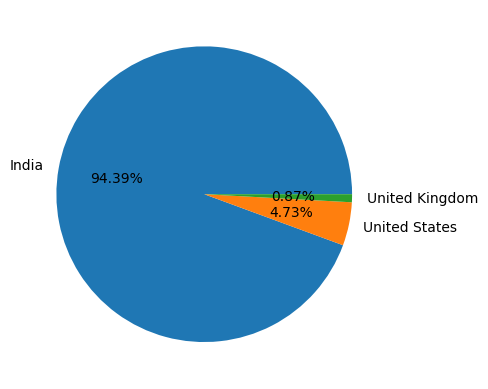

In [21]:
plt.pie(country_record_count[:3],labels=country_names[:3],autopct='%1.2f%%');

## Observation: 
> Most of the partnered restaurants are from India. (More than 90%)

## Q. Does zomato's nature of rating follows "Pareto's Principle"? 

In [22]:
text_ratings = merged_df['Rating text']
text_ratings #Remember that Cuisines had null value but as we Rating text column doesn't have any null value

0       Excellent
1       Excellent
2       Very Good
3       Excellent
4       Excellent
          ...    
9546    Very Good
9547    Very Good
9548         Good
9549    Very Good
9550    Very Good
Name: Rating text, Length: 9551, dtype: object

In [23]:
text_freq = text_ratings.value_counts()
text_keys = text_freq.keys()
text_vals = text_freq.values

rating_text_table = pd.DataFrame({"Rating text":text_keys, "Frequency":text_vals})
rating_text_table["Percent"] = rating_text_table["Frequency"] / rating_text_table["Frequency"].sum() * 100
rating_text_table

,Rating text,Frequency,Percent
0,Average,3737,39.126793
1,Not rated,2148,22.489792
2,Good,2100,21.987226
3,Very Good,1079,11.297246
4,Excellent,301,3.151502
5,Poor,186,1.947440


In [24]:
rating_text_table = rating_text_table.sort_values(by=["Frequency"], ascending=False)
rating_text_table = rating_text_table.reset_index(drop=True)
rating_text_table

,Rating text,Frequency,Percent
0,Average,3737,39.126793
1,Not rated,2148,22.489792
2,Good,2100,21.987226
3,Very Good,1079,11.297246
4,Excellent,301,3.151502
5,Poor,186,1.947440


In [25]:
rating_text_table["Cumulative Percent"] = rating_text_table["Frequency"].cumsum() / rating_text_table["Frequency"].sum() * 100
rating_text_table

,Rating text,Frequency,Percent,Cumulative Percent
0,Average,3737,39.126793,39.126793
1,Not rated,2148,22.489792,61.616585
2,Good,2100,21.987226,83.603811
3,Very Good,1079,11.297246,94.901057
4,Excellent,301,3.151502,98.052560
5,Poor,186,1.947440,100.000000


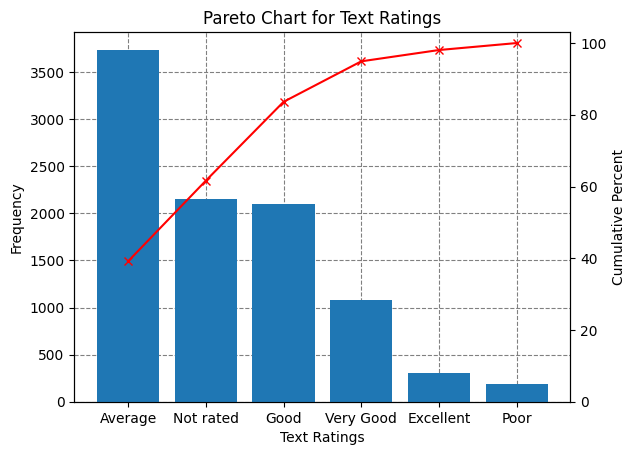

In [26]:
fig, ax=plt.subplots()
plt.title("Pareto Chart for Text Ratings")

ax.set_xlabel("Text Ratings")
ax.bar("Rating text","Frequency", data = rating_text_table,zorder=3)
ax.set_ylabel("Frequency")
ax.set_ylim(ymin=0)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')

ax2=ax.twinx()
ax2.plot("Rating text","Cumulative Percent", data = rating_text_table, marker = "x", color="red",zorder=3)
ax2.set_ylabel("Cumulative Percent")
ax2.set_ylim(ymin=0)

plt.show()

## Observation: 
> More than 80% of the "text rating" consists of "Average", "Not Rated" or "Good".

###  Let's deep dive into ratings more !

In [27]:
merged_df.groupby(["Aggregate rating","Rating color","Rating text"]).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [28]:
ratings = merged_df.groupby(["Aggregate rating","Rating color","Rating text"]).size().reset_index().rename(columns={0:"Rating Count"})

In [29]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


## Observation:
1. Ratings [4.5, 5) means Excellent
2. Ratings [4, 4.5) means Very Good
3. Ratings [3.5, 4) means Good
4. Ratings [2.5, 3.5) means Average
5. Ratings (0, 2.5) means Poor

In [30]:
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


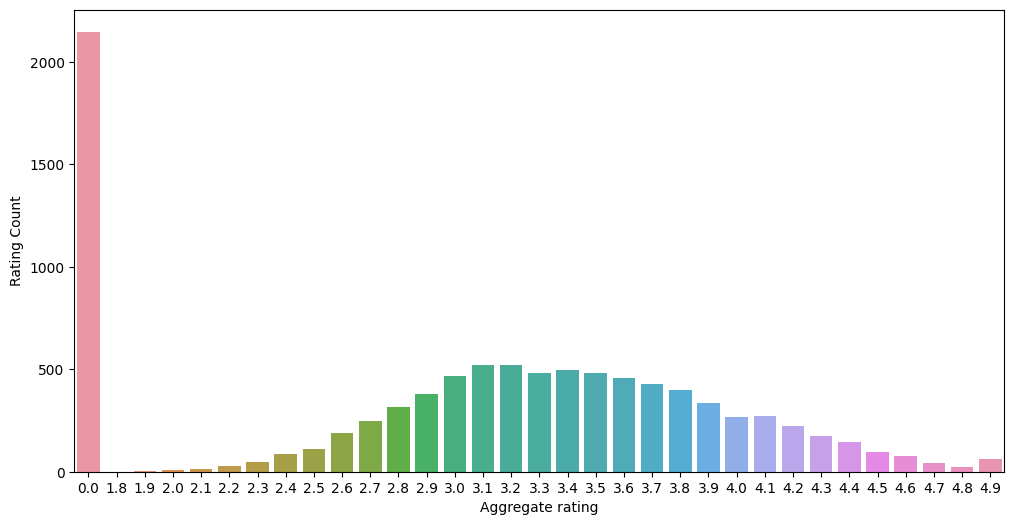

In [31]:
plt.rcParams['figure.figsize'] = (12,6)
sns.barplot(x="Aggregate rating", y="Rating Count", data=ratings);

**Gausian Distribution** or **Normal Distribution** can be seen here.

Let's try to have *same color* which is given as **"Rating color"**

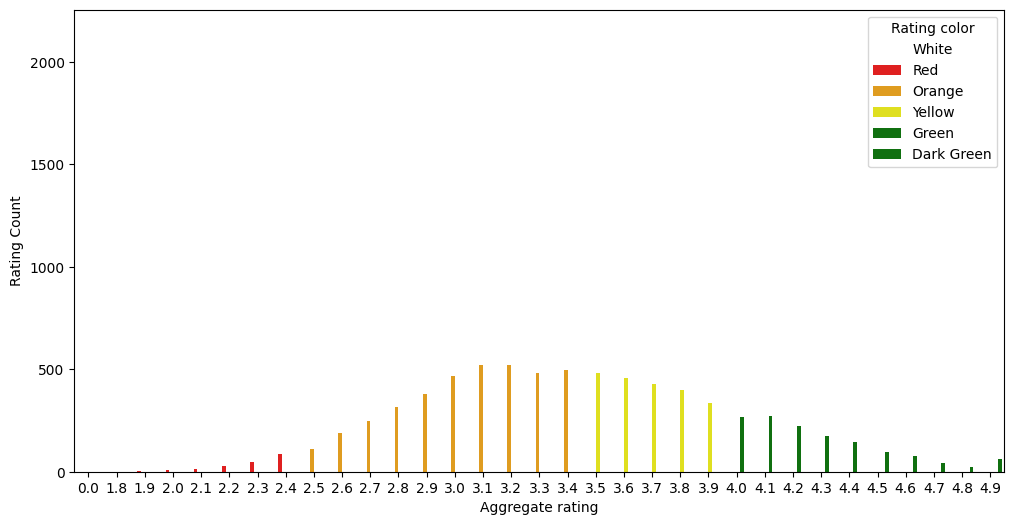

In [32]:
sns.barplot(x="Aggregate rating", y="Rating Count", data=ratings, hue="Rating color", palette=["white","red","orange","yellow","green","green"]);
sns.set_style("darkgrid")

## Observation:
1. Not Rated count is extremely high.
2. When the Not Rated counts aren't considered then it shows gaussian distribution

### Frequency Distribution of the Rating Colors

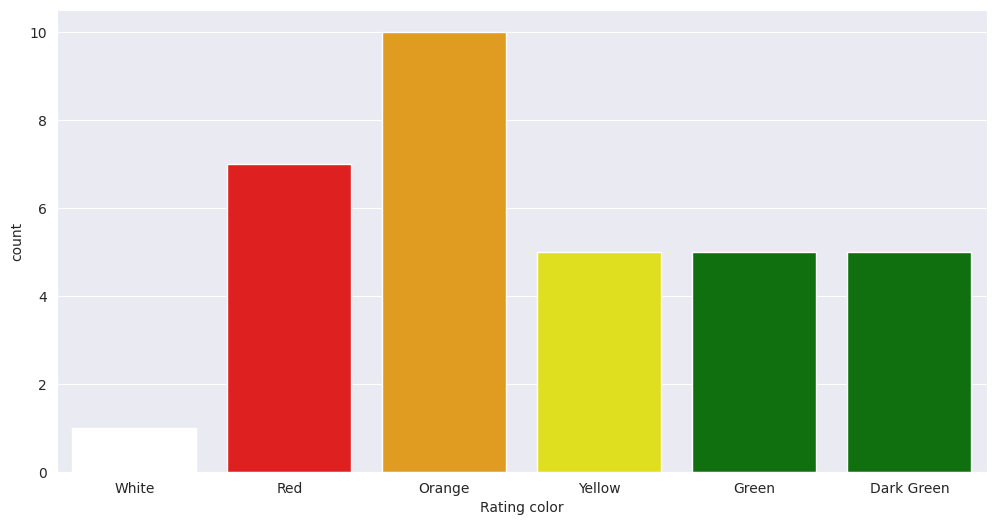

In [33]:
sns.countplot(x="Rating color", data = ratings, palette=["white","red","orange","yellow","green","green"])
sns.set_style("darkgrid")

## Q. Which country rated restraunts as 0 and how many times ?

**1st Method**

In [34]:
country_rated_zero = merged_df[merged_df["Rating color"] == "White"].groupby("Country").size().reset_index()
country_rated_zero

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


**2nd Method**

In [35]:
country_rated_zero2 = merged_df.groupby(["Aggregate rating","Country"]).size().reset_index().head(4)
country_rated_zero2

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3


## Observation:
> Maximum no. of 0 ratings are from **Indian customers**

## Q. Find out which currency is used by which country ? 

In [36]:
country_currency = merged_df.groupby(["Country","Currency"]).size().reset_index().rename(columns={0:"Count"})
country_currency.pop("Count")
country_currency

,Country,Currency
0,Australia,Dollar($)
1,Brazil,Brazilian Real(R$)
2,Canada,Dollar($)
3,India,Indian Rupees(Rs.)
4,Indonesia,Indonesian Rupiah(IDR)
5,New Zealand,NewZealand($)
6,Phillipines,Botswana Pula(P)
7,Qatar,Qatari Rial(QR)
8,Singapore,Dollar($)
9,South Africa,Rand(R)


## Q. Which Countries have online deliveries option ?

### The below code show all the data about which country has online delivery and which doen't have

In [37]:
online_delivery = merged_df.groupby(["Country","Has Online delivery"]).size().reset_index()
online_delivery

,Country,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


In [38]:
online_delivery = merged_df.groupby(["Country","Has Online delivery"]).size().reset_index().rename(columns={0:"Count"})
online_delivery.pop("Count")
online_delivery

,Country,Has Online delivery
0,Australia,No
1,Brazil,No
2,Canada,No
3,India,No
4,India,Yes
5,Indonesia,No
6,New Zealand,No
7,Phillipines,No
8,Qatar,No
9,Singapore,No


### The below code show data about which country has online delivery

In [39]:
online_delivery_country = online_delivery[online_delivery["Has Online delivery"] != "No" ]
online_delivery_country

,Country,Has Online delivery
4,India,Yes
14,UAE,Yes


## Observation:
> Only **India** and **UAE** has the online delivery service.

> In **India** nearly 40% Restaurants offer online delivery services.

## Q. Provide a pie chart representation of restaurants in the top 5 Indian cities that offer online delivery options?

In [40]:
df_india = merged_df[merged_df["Country"] == "India"]
df_india_online_dlvry = df_india[df_india["Has Online delivery"] != "No"]
df_top_5_cities = df_india_online_dlvry["City"].value_counts().head()
df_city = df_top_5_cities.reset_index()

df_city.columns.values[0] = "City"
df_city.columns.values[1] = "Restaurant Count"

df_city

,City,Restaurant Count
0,New Delhi,1489
1,Gurgaon,425
2,Noida,364
3,Faridabad,35
4,Chennai,13


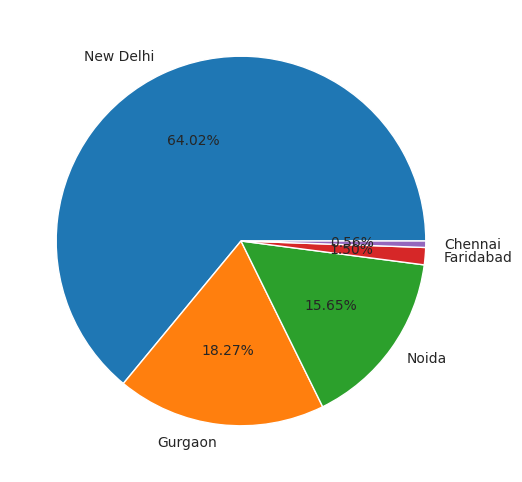

In [41]:
plt.pie(df_city["Restaurant Count"], labels=df_city["City"],autopct='%1.2f%%');

## Observation:
> Pie Chart reveals that most Zomato's Online Delivery Business has mostly captured the **Northern metropolitan Cities of India**
> India's capital **New Delhi** is city which registered **most online food delivery service** giving restaurants

## Q. Find Top 5 Cuisines in Histogram form ?

In [42]:
cuisines = merged_df["Cuisines"]
cuisines

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object

In [43]:
merged_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [44]:
modified_df = merged_df.copy()

In [45]:
modified_df.dropna(subset=['Cuisines'], inplace=True)

In [46]:
cuisines = modified_df["Cuisines"]
cuisines

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9542, dtype: object

In [47]:
cuisines_vals = cuisines.values

In [48]:
cuisines_list = cuisines_vals.tolist()

In [49]:
separated_cuisines = [cuisine.split(', ') for cuisine in cuisines_list]

In [50]:
flattened_cuisines = [cuisine for sublist in separated_cuisines for cuisine in sublist]


In [51]:
# Use Counter to count the occurrences of each cuisine
cuisine_counts = Counter(flattened_cuisines)

# Convert Counter to a DataFrame
frequency_df = pd.DataFrame(list(cuisine_counts.items()), columns=['Cuisine', 'Frequency'])

# Sort the DataFrame by frequency in descending order
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False)

In [52]:
top_5_cuisines =  frequency_df.head(5)

In [53]:
top_5_cuisines

,Cuisine,Frequency
81,North Indian,3960
9,Chinese,2735
19,Fast Food,1986
82,Mughlai,995
15,Italian,764


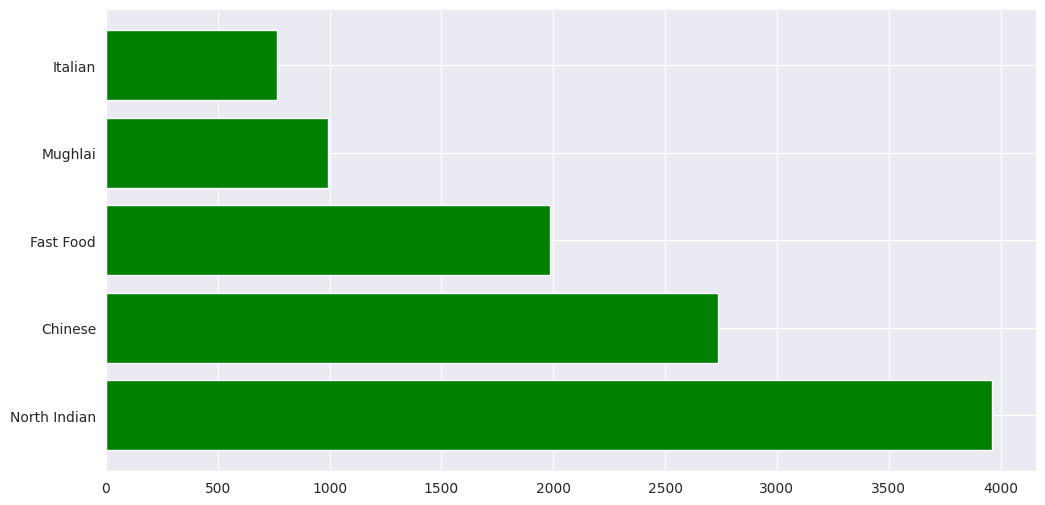

In [54]:
plt.barh(top_5_cuisines.Cuisine, top_5_cuisines.Frequency,color="green");